In [2]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!!pip install matplotlib-venn

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Requirement already satisfied: matplotlib-venn in /usr/local/lib/python3.7/dist-packages (0.11.7)',
 'Requirement already satisfied: scipy in /usr/local/lib/python3.7/dist-packages (from matplotlib-venn) (1.7.3)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.7/dist-packages (from matplotlib-venn) (1.21.6)',
 'Requirement already satisfied: matplotlib in /usr/local/lib/python3.7/dist-packages (from matplotlib-venn) (3.2.2)',
 'Requirement already satisfied: python-dateutil>=2.1 in /usr/local/lib/python3.7/dist-packages (from matplotlib->matplotlib-venn) (2.8.2)',
 'Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.7/dist-packages (from matplotlib->matplotlib-venn) (0.11.0)',
 'Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /usr/local/lib/python3.7/dist-packages (from matplotlib->matplotlib-venn) (3.0.9)',
 'Requireme

In [26]:
!pip install cv2-plt-imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import cv2
from cv2_plt_imshow import cv2_plt_imshow, plt_format
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [10]:
data = pd.read_csv(r"/content/drive/MyDrive/Handwritten/A_Z Handwritten Data.csv").astype('float32')

In [32]:
X = data.drop('0',axis = 1)
y = data['0']


train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

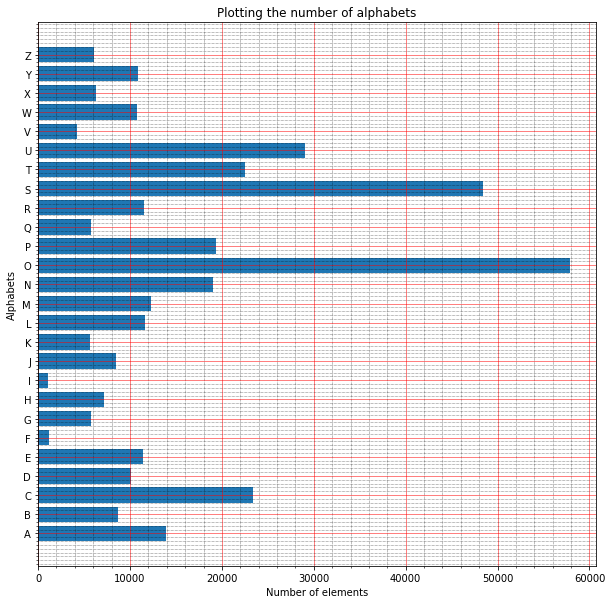

In [14]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)


fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

# naming the x axis
plt.xlabel("Number of elements")
# naming the y axis
plt.ylabel("Alphabets")
# giving a title  
plt.title("Plotting the number of alphabets")
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

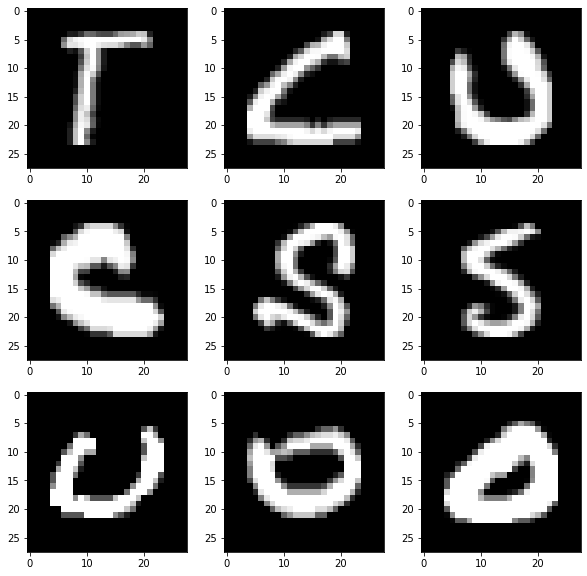

In [15]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap=plt.get_cmap('gray'))
plt.show()

In [16]:
# Reshape data for model creation
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("The new shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("The new shape of train data: ", test_X.shape)

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("The new shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("The new shape of test labels: ", test_yOHE.shape)

The new shape of train data:  (297960, 28, 28, 1)
The new shape of train data:  (74490, 28, 28, 1)
The new shape of train labels:  (297960, 26)
The new shape of test labels:  (74490, 26)


In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [20]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1, validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 388s 42ms/step - loss: 0.1715 - accuracy: 0.9545 - val_loss: 0.0859 - val_accuracy: 0.9761


In [21]:
model.summary()
model.save(r'model_hand.h5')

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

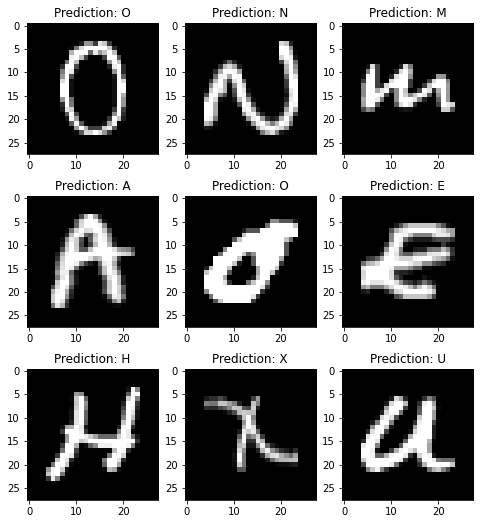

In [22]:
# Prediction on test data
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img,  cmap=plt.get_cmap('gray'))
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)